<a href="https://colab.research.google.com/github/LCG2021/Classification-on-the-Telco-Churn-Dataset/blob/main/FinalProject2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Choice  2: Classification on the Telco-Churn Dataset
The dataset and its description is available at Kaggle. The goal of this task is to analyze the behavior of telecom customers and understand what factors are important to retain customers.
1.       Visualize the univariate distribution of each input variable and the target variable “churn”.
2.       Split data into training and test sets. Convert each categorical variable into numerical variables using one-hot-encoding.
Example of one-hot encoding:
Gender: Male -> (1, 0), Female -> (0, 1)
Ethnicity: 1. Caucasian, 2. African American, 3. Hispanic, 4. Asian, 5 Native American, 6 Pacific Islander
One-hot encoded labels: 1 → (1, 0, 0, 0, 0, 0)
				2 → (0, 1, 0, 0, 0, 0)
				6 → (0, 0, 0, 0, 0, 1)
3.  Evaluate the following classification models:
a.      Logistic Regression
b.     Support Vector Machine
c.       K Nearest Neighbors
d.       Decision Trees
e. Random Forests
Note that you need to decide the choice of hyper-parameters for the models, such as the value of k for k nearest neighbor method and the maximum depth for the random forest method.
4.       Choose the best model by analyzing the accuracy, precision, recall, and F-1 score.
5.       Which types of customers are less likely to end the service? 


In [ ]:
import string
import numpy as np
import pandas as pd
from pandas import *
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
raw_data = pd.read_csv("/content/WA_Fn-UseC_-Telco-Customer-Churn.csv", sep=',')
raw_data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [ ]:
raw_data.shape

(7043, 21)

In [ ]:
raw_data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [ ]:
# Are there any missing values?
raw_data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [ ]:
raw_data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [ ]:
raw_data['Churn'].value_counts().sort_index()

No     5174
Yes    1869
Name: Churn, dtype: int64

### 1. Visualize the univariate distribution of each input variable and the target variable “churn”.

In [ ]:
#Drop Customer ID
data = raw_data.drop(['customerID'], axis=1)

special_col = ['TotalCharges','tenure','MonthlyCharges']

b_names = data.columns.to_list()

#remove columns from column name list
for i in special_col:
  b_names.remove(i)

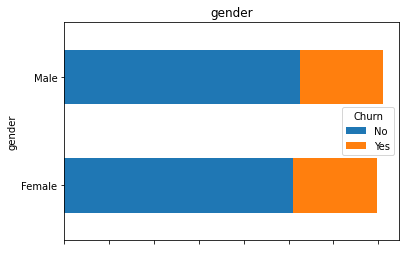

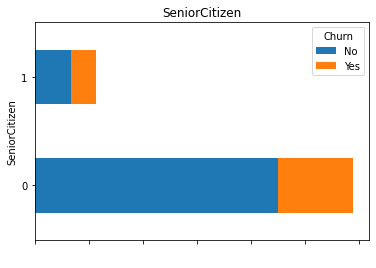

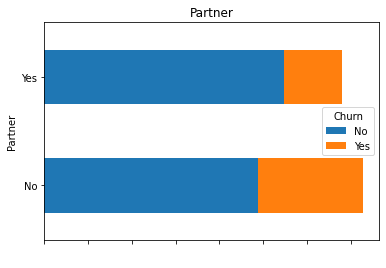

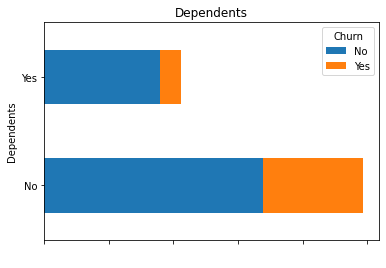

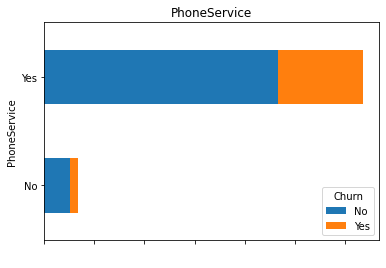

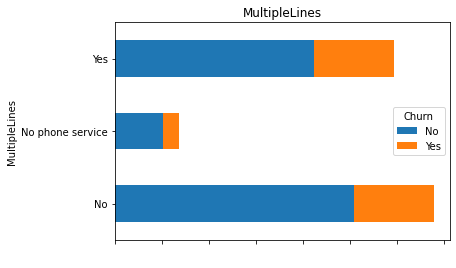

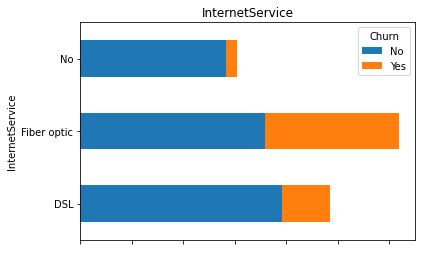

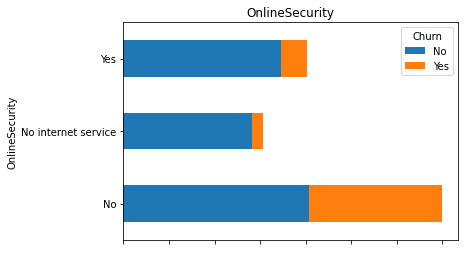

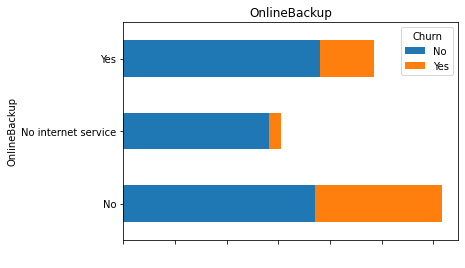

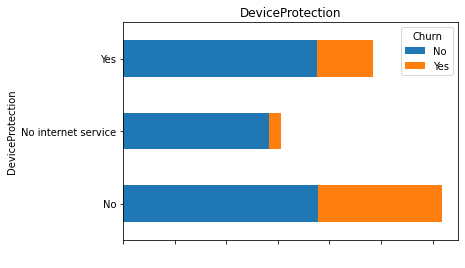

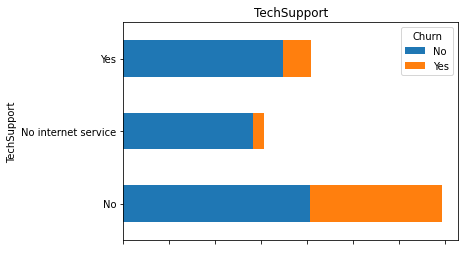

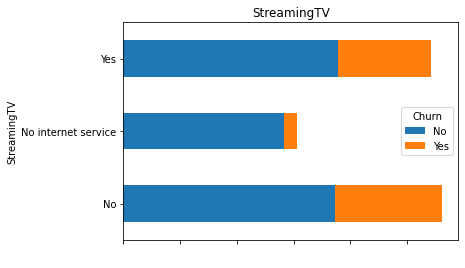

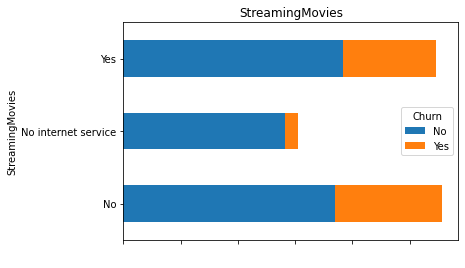

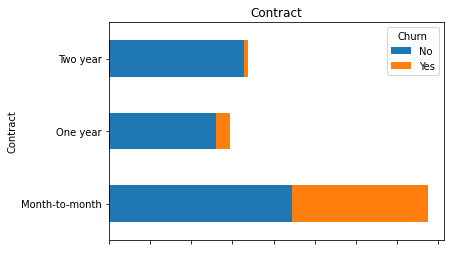

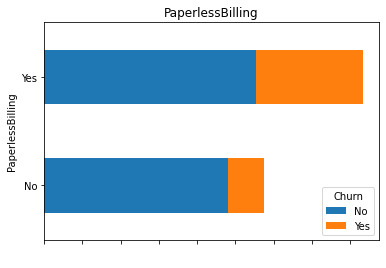

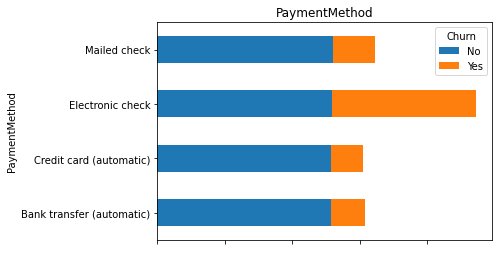

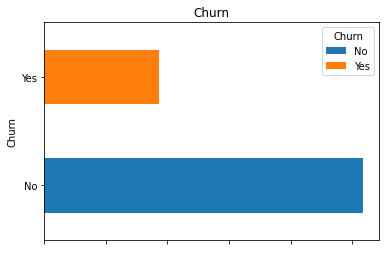

In [ ]:
for i in b_names:
  chart = pd.crosstab(data[i], data['Churn']).plot(kind='barh', stacked=True)
  chart.set(title=i)
  chart.set_xticklabels(chart.get_xticklabels(),rotation = 45)
  chart.set(xlabel =" ")
  chart

### 2. Split data into training and test sets. Convert each categorical variable into numerical variables using one-hot-encoding.

In [ ]:
# print(data.loc[[1340]])
# data['TotalCharges'].repalce({" ": 0.0}, inplace = True)
# data['TotalCharges'] = data.TotalCharges.astype(float)
# data.dtypes

In [ ]:
data.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [ ]:
df2 = raw_data.drop(['customerID','tenure','MonthlyCharges','TotalCharges'], axis=1)
one_hot_encoding = pd.get_dummies(df2, sparse=True)
one_hot_encoding

,SeniorCitizen,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_No,Churn_Yes
0,0,1,0,0,1,1,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0
1,0,0,1,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1,1,0
2,0,0,1,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,1
3,0,0,1,1,0,1,0,1,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,1,0,1,0,0,0,1,0
4,0,1,0,1,0,1,0,0,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,1,0,1,0,1,0,1,0,0,1,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,1,1,0
7039,0,1,0,0,1,0,1,0,1,0,0,1,0,1,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,1,0,1,0,0,1,0,1,0,0,1,0
7040,0,1,0,0,1,0,1,1,0,0,1,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0
7041,1,0,1,0,1,1,0,0,1,0,0,1,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,1


In [ ]:
one_hot_encoding.shape

(7043, 44)

In [ ]:
one_hot_encoding.columns

Index(['SeniorCitizen', 'gender_Female', 'gender_Male', 'Partner_No',
       'Partner_Yes', 'Dependents_No', 'Dependents_Yes', 'PhoneService_No',
       'PhoneService_Yes', 'MultipleLines_No',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No', 'OnlineBackup_No internet service',
       'OnlineBackup_Yes', 'DeviceProtection_No',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No', 'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No', 'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No', 'StreamingMovies_No internet service',
       'StreamingMovies_Yes', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaperlessBilling_No', 'PaperlessBilling_Yes',
     

In [ ]:
# Split the data set into training set (80%) and test set (20%), 
from sklearn.model_selection import train_test_split
training_data, test_data = train_test_split(one_hot_encoding, test_size=0.2)

In [ ]:
# Display the shape of training set
training_data.shape

(5634, 44)

In [ ]:
# Display the shape of test set
test_data.shape

(1409, 44)

In [ ]:
names = training_data.columns.to_list()
names.remove('Churn_Yes')
names.remove('Churn_No')
names

['SeniorCitizen',
 'gender_Female',
 'gender_Male',
 'Partner_No',
 'Partner_Yes',
 'Dependents_No',
 'Dependents_Yes',
 'PhoneService_No',
 'PhoneService_Yes',
 'MultipleLines_No',
 'MultipleLines_No phone service',
 'MultipleLines_Yes',
 'InternetService_DSL',
 'InternetService_Fiber optic',
 'InternetService_No',
 'OnlineSecurity_No',
 'OnlineSecurity_No internet service',
 'OnlineSecurity_Yes',
 'OnlineBackup_No',
 'OnlineBackup_No internet service',
 'OnlineBackup_Yes',
 'DeviceProtection_No',
 'DeviceProtection_No internet service',
 'DeviceProtection_Yes',
 'TechSupport_No',
 'TechSupport_No internet service',
 'TechSupport_Yes',
 'StreamingTV_No',
 'StreamingTV_No internet service',
 'StreamingTV_Yes',
 'StreamingMovies_No',
 'StreamingMovies_No internet service',
 'StreamingMovies_Yes',
 'Contract_Month-to-month',
 'Contract_One year',
 'Contract_Two year',
 'PaperlessBilling_No',
 'PaperlessBilling_Yes',
 'PaymentMethod_Bank transfer (automatic)',
 'PaymentMethod_Credit card 

### 3. Evaluate the following classification models:


### Logistic Regression

In [ ]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# Build the logistic regression model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(training_data[names], training_data['Churn_Yes'])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
test_predictions = model.predict(test_data[names])
print(test_predictions)

[1 0 1 ... 0 0 0]


In [ ]:
# 1. Find the prediction accuracy on test set
from sklearn.metrics import accuracy_score
accuracy_score(test_data['Churn_Yes'], test_predictions)

0.7977288857345636

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score
precision = precision_score(test_data['Churn_Yes'], test_predictions)
recall = recall_score(test_data['Churn_Yes'], test_predictions)
f1 = f1_score(test_data['Churn_Yes'], test_predictions)

print("Precision Score is: ", precision)
print("Recall Score is: ", recall)
print("F1 Score is: ", f1)

Precision Score is:  0.6222222222222222
Recall Score is:  0.5414364640883977
F1 Score is:  0.5790251107828656


### SVM

In [ ]:
from sklearn.svm import LinearSVC
model_svm = LinearSVC()
model_svm.fit(training_data[names], training_data['Churn_Yes'])

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [ ]:
predictions = model_svm.predict(test_data[names])
print(predictions)

[1 0 1 ... 0 0 0]


In [ ]:
accuracy_score(test_data['Churn_Yes'], predictions)

0.801277501774308

In [ ]:
precision = precision_score(test_data['Churn_Yes'], predictions)
recall = recall_score(test_data['Churn_Yes'], predictions)
f1 = f1_score(test_data['Churn_Yes'], predictions)

print("Precision Score is: ", precision)
print("Recall Score is: ", recall)
print("F1 Score is: ", f1)

Precision Score is:  0.6375838926174496
Recall Score is:  0.5248618784530387
F1 Score is:  0.5757575757575757


### K - Nearest Neighbor 

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(training_data[names], training_data['Churn_Yes'])

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [ ]:
knn_predictions = knn.predict(test_data[names])
print(knn_predictions)

[1 0 1 ... 0 0 0]


In [ ]:
accuracy_score(test_data['Churn_Yes'], knn_predictions)

0.7430801987224982

In [ ]:
precision = precision_score(test_data['Churn_Yes'], knn_predictions)
recall = recall_score(test_data['Churn_Yes'], knn_predictions)
f1 = f1_score(test_data['Churn_Yes'], knn_predictions)

print("Precision Score is: ", precision)
print("Recall Score is: ", recall)
print("F1 Score is: ", f1)

Precision Score is:  0.5
Recall Score is:  0.5220994475138122
F1 Score is:  0.5108108108108109


### Decision Tree's

In [ ]:
# 2. Build decision trees
from sklearn.tree import DecisionTreeClassifier

x = training_data[names]
y = training_data['Churn_Yes']

x_test = test_data[names]
y_test = test_data['Churn_Yes']

tree_clf = DecisionTreeClassifier(max_depth=3, random_state = 43)

tree_clf.fit(x,y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=43, splitter='best')

In [ ]:
pred_test = tree_clf.predict(x_test)
print(accuracy_score(y_test,pred_test))

0.7920511000709723


In [ ]:
precision = precision_score(test_data['Churn_Yes'], pred_test)
recall = recall_score(test_data['Churn_Yes'], pred_test)
f1 = f1_score(test_data['Churn_Yes'], pred_test)

print("Precision Score is: ", precision)
print("Recall Score is: ", recall)
print("F1 Score is: ", f1)

Precision Score is:  0.5945205479452055
Recall Score is:  0.5994475138121547
F1 Score is:  0.5969738651994498


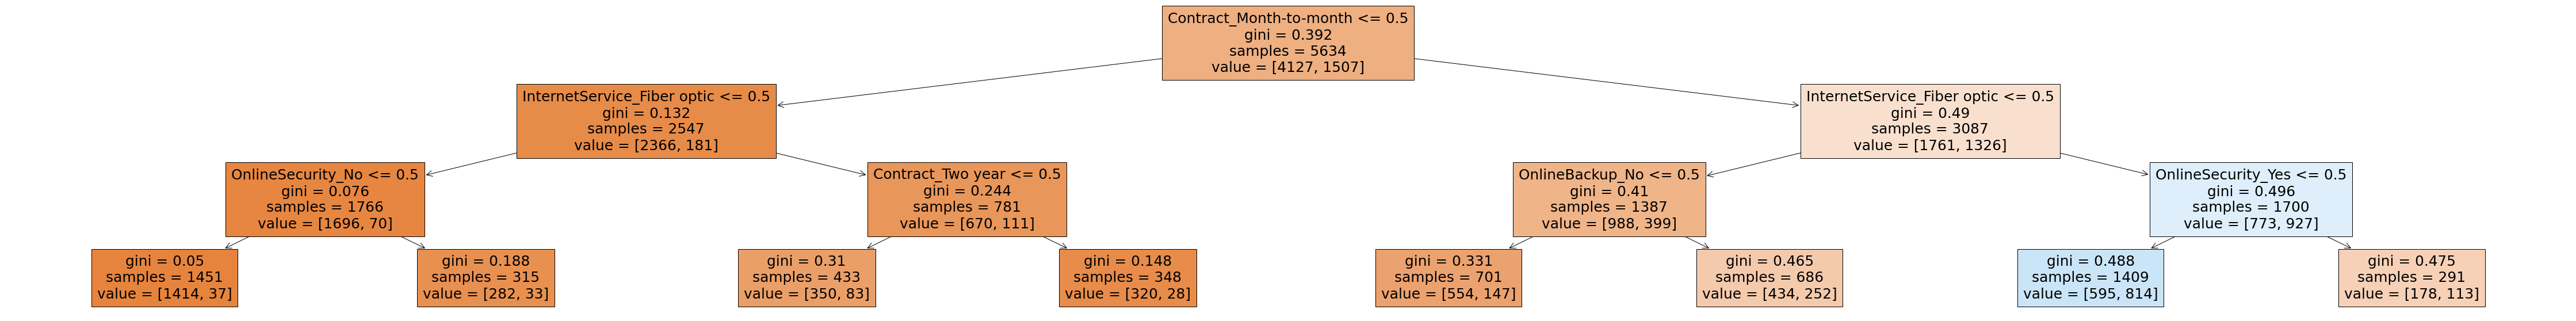

In [ ]:
from sklearn.tree import plot_tree
plt.figure(figsize = (80,10))
plot_tree(tree_clf, feature_names = x.columns, filled = True)
plt.show()

### Random Forests

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_class = RandomForestClassifier(n_estimators = 500, max_depth = 2, n_jobs = -1)
rf_class.fit(x,y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=2, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=-1, oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [ ]:
y_pred_test = rf_class.predict(x_test)
print(accuracy_score(y_test, y_pred_test))

0.7430801987224982


In [ ]:
precision = precision_score(test_data['Churn_Yes'], y_pred_test)
recall = recall_score(test_data['Churn_Yes'], y_pred_test)
f1 = f1_score(test_data['Churn_Yes'], y_pred_test)

print("Precision Score is: ", precision)
print("Recall Score is: ", recall)
print("F1 Score is: ", f1)

Precision Score is:  0.0
Recall Score is:  0.0
F1 Score is:  0.0


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print("The Accuracy Score for Logistic Regression is: ", accuracy_score(test_data['Churn_Yes'], test_predictions))
print("The Accuracy Score for SVM is:                 ", accuracy_score(test_data['Churn_Yes'], predictions))
print("The Accuracy Score for K Nearest Neighbor is:  ", accuracy_score(y_test,pred_test))
print("The Accuracy Score for Random Forrest is:      ", accuracy_score(y_test, y_pred_test))

The Accuracy Score for Logistic Regression is:  0.7977288857345636
The Accuracy Score for SVM is:                  0.801277501774308
The Accuracy Score for K Nearest Neighbor is:   0.7906316536550745
The Accuracy Score for Random Forrest is:       0.7430801987224982


## 4. In Conclussion, Logistric Regression and SVM are the best models to use since they have the highest Accuracy scores and the best Precision, Recall, and F1 scores overall. However SVM has slightly highesr scores so it is the best. 

# 5. Based off of our Decision Tree we can see that most customers left because of:

1. Customers with a "Month to Month" style of contract are more likely to leave than customers with a different contract.

2. Customers with a Fiber Optic conection were also more likely to leave than other customers. 

3. Customers who had no internet security were also more likely to leave. 

We can also see in our Decision Tree that customers were more likely to stay if:

  1. They did not have a Fiber Optic Connection

  2. Along with having Internet Security